In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 3]

# Exercise 1 {-}

In exercise 1 a few theoretical questions on Bayesian statistics are answered. In answering the question a linear model of the form $y=ax+b+\varepsilon$ is considered with $\varepsilon$ being a Gaussian noise with 0 mean and standard deviation $\sigma$.

a) The explicit probability density function of $\varepsilon$ is $\varepsilon(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x}{\sigma})^2}$.

b) The conditional probability distribution of $y$ knowing $a$, $x$ and $b$ is $P(y|axb)=\frac{P(axb|y)}{P(axb)}P(y)$.

c) The parameters of the linear model are $x$ which is the independent variable, $a$ which is the slope i.e. the expected change in $y$ per unit change in $x$, $b$ which is the expected value of $y$ for $x=0$ and lastly $\varepsilon$ which is the Gaussian noise as described above. 


# Exercise 2 {-}

In exercise 2 linear regression will be implemented and used on the 'redwine' dataset to predict the quality of the wine from its physiochemical properties.  

First the multivariate linear regression function is defined. 

In [2]:
#define multivariate linear regression function
def multivarlinreg(x,y):
    if x.ndim == 1:
        x = x.reshape(-1,1)
    x = np.append(np.ones((x.shape[0],1)), x, axis=1)
    w = np.linalg.inv(x.T@x)@x.T@y
#     if len(np.shape(x)) == 1:
#         w = [((x.T@x)**-1)*x.T@y]
#     else:
#         w = np.linalg.inv(x.T@x)@x.T@y
#     weights = np.insert(w,0,1) #SLET DET HER
    
#     return weights
    return w

Next the linear regression function is run on a version of the redwine training dataset that only contains the first feature (the fixed acidity).

In [3]:
#import redwine dataset 
wine_train = np.loadtxt('redwine_training.txt')
#define the first feature (fixed acidity)
acidity = wine_train[:,0]
#define the output values (quality)
quality = wine_train[:,-1]

#run regression function to get the free parameters
weights = multivarlinreg(acidity, quality)
weights

array([5.2057261 , 0.05035934])

The weight of the acidity in the weighted sum of parameters contributing to the quality of the redwine is 0.05. As it is positive, a fixed acidity positively affects the quality of the wine. 

Next the linear regression function is run on the entire redwine training dataset

In [4]:
#define the matrix of wine properties
props = wine_train[:,:-1]

#run regression function to get the free parameters
weights = multivarlinreg(props, quality)
weights

array([ 5.16573717e+01,  1.95852727e-02, -1.06193618e+00,  2.58896285e-02,
        5.02281634e-02, -2.75489463e+00,  5.65346092e-03, -3.80728880e-03,
       -4.72092423e+01, -4.26639379e-01,  8.50478130e-01,  2.37895900e-01])

The relative weight of the different parameters show how much they each relatively contribute to the quality of the wine. 

# Exercise 3 {-}

In exercise 3 the accuracy of the multivariate linear regression function from exercise 2 is tested by computing the root mean square error (RMSE). The RMSE-function compares the true values of the dependent variable to the values of the dependent values that were computed using the weights from the multivariate linear regression function. 

First the RMSE-function is defined. 

In [5]:
def rmse(f,t):
#     rmse = np.sqrt(sum((t[i]-f[i])**2 for i in range(len(f)))/len(f))
    rmse = np.sqrt(np.sum((t-f)**2)/len(t))
    
    return rmse

In [6]:
def linear_model(x, w):
    if x.ndim == 1:
        x = x.reshape(-1,1)
    x = np.append(np.ones((x.shape[0],1)), x, axis=1)
    y = w.T@x.T
    
    return y

In [7]:
#compute RMSE for 1D input of redwine dataset
wine_test = np.loadtxt('redwine_testing.txt')
acidity_test = wine_test[:,0]
quality_test = wine_test[:,-1]

acidity_train = wine_train[:,0]
quality_train = wine_train[:,-1]
weights = multivarlinreg(acidity_train, quality_train)


# predicted_quality = weights[0]+acidity*weights[1]
predicted_quality = linear_model(acidity_test, weights)
print('The root mean square error of the regression funcion using just one dimension of the training dataset is ' +str(rmse(predicted_quality, quality_test)))

The root mean square error of the regression funcion using just one dimension of the training dataset is 0.7860892754162229


In [8]:
#compute RMSE for full redwine dataset
props_train = wine_train[:,:-1]
props_test = wine_test[:,:-1]
weights = multivarlinreg(props_train, quality_train)

predicted_quality = linear_model(props_test, weights)
print('The root mean square error of the regression funcion using the full training dataset is ' +str(rmse(predicted_quality, quality_test)))

The root mean square error of the regression funcion using the full training dataset is 0.644717277302212


The root mean square error of the regression function is smaller when using the complete training dataset instead of just using one dimension of the training dataset. 

# Exercise 4 {-}

In exercise 4 it is discussed how normalizing data beforehand affects a random forest classifier.

A random forest classifier is a classifier that is based on a number of different decision trees. Decision trees are not based on any euclidian distances so no normalizing is needed for decision trees nor for a random forest classifier. Normalizing data to zero mean and unit variance before performing random forest classificiation makes no difference compared to not normalizing the data beforehand. 

# Exercise 5 {-}

In excerise 5 random forest classification is performed on the pesticide dataset from previous assignments using scikit-learn's random forest classifier function. 

First the random forest classifier function is imported. 

In [9]:
#import random forest function
from sklearn.ensemble import RandomForestClassifier

Next a random forest of 50 trees is trained using the pesticide training set. 

In [10]:
#import pesticide training dataset
PestTrain = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
XTrain = PestTrain[:,:-1]
YTrain = PestTrain[:,-1]

#train the random forest
forest=RandomForestClassifier(n_estimators=50)
forest.fit(XTrain, YTrain)

#use the random forest to predict pesticide test data
PestTest = np.loadtxt('IDSWeedCropTest.csv', delimiter=',')
XTest = PestTest[:,:-1]
Predicted_YTest = forest.predict(XTest)

Next the accuracy of the random forest classifier is computed by comparing the predicted value of YTest to the true values. 

In [11]:
#define true YTest values
YTest = PestTest[:,-1]

#compare predicted and true values
compare = []
for i in range(len(YTest)):
    if Predicted_YTest[i] == YTest[i]:
        compare.append(1)

accuracy = sum(compare)/len(YTest)
print('The prediction accuracy of the random forest is ' +str(accuracy))

The prediction accuracy of the random forest is 0.9721254355400697


# Exercise 6 {-}

In exercise 6 gradient descend is applied to compute the minimum of the function $f(x)=exp(-x/2)+10x^2$. 


In [12]:
#define gradient descend function
def gradient_descend(rate):
    #initialize parameters
    cur_x = 1 #the algorithm starts at x=1
    min_gradient = 10**(-10) 
    max_iters = 10000 
    iters = 0 #iteration counter
    df = lambda x: 20*x-np.exp(-x/2)/2  #derivative of the function
    xs = []
    xs.append(cur_x)

    #apply gradient descend
    while abs(df(cur_x)) >= min_gradient and iters < max_iters:
        prev_x = cur_x 
        cur_x = cur_x-rate*df(prev_x) #gradient descent
        iters = iters+1 
        xs.append(cur_x)
        
    return cur_x, iters, np.array(xs)     

#define function
def f(x):
    return np.exp(-x/2)+10*x**2

#define plotting function 
def plot_gradient_descend(rate):
    cur_x, iters, xs = gradient_descend(rate)

    #define function, derivatie and plotting range
    y = lambda x: np.exp(-x/2)+10*x**2
    df = lambda x: 20*x-np.exp(-x/2)/2
    x = np.linspace(-1,1,101)
    
    #define tangent for plotting
    def tan(x,x1,y1):
        return df(x1)*(x-x1)+y1
    
    #plot first four gradient descend steps with tangents
    plt.figure()
    plt.plot(x,y(x),c='k')
    for i in xs[:4]:
        tan_range = np.linspace(i-0.2, i+0.2, 10)
        plt.plot(tan_range, tan(tan_range,i,y(i)), 'b')
        plt.plot(i,y(i),'ro')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('First four gradient descend steps with \n learning rate '+str(rate)+' and corresponding tangents')
    
    #plot first ten gradient descend steps
    plt.figure()
    plt.plot(x,y(x),c='k')
    plt.plot(xs[:10],y(xs[:10]),'ro')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('First ten gradient descend steps with \n learning rate '+str(rate))
    plt.show()
    
    return 'For a learning rate at '+str(rate)+' the local minimum occurs at '+ str(cur_x)+ ' after '+str(iters)+' iterations. The function value at the local minimum is '+ str(f(cur_x))

C:\Users\amali\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
C:\Users\amali\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


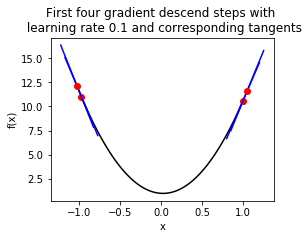

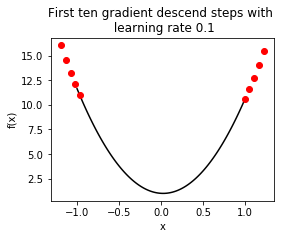

For a learning rate at 0.1 the local minimum occurs at nan after 69 iterations. The function value at the local minimum is nan


In [13]:
#for learning rate 0.1
rate = 0.1
print(plot_gradient_descend(rate))

The learning rate of 0.1 is too large so the gradient function is unable to compute a minimum for the function. 

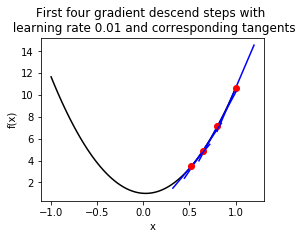

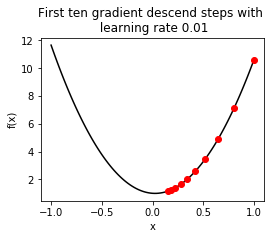

For a learning rate at 0.01 the local minimum occurs at 0.024693232270265097 after 115 iterations. The function value at the local minimum is 0.993826847811084


In [14]:
#for learning rate 0.01
rate = 0.01
print(plot_gradient_descend(rate))

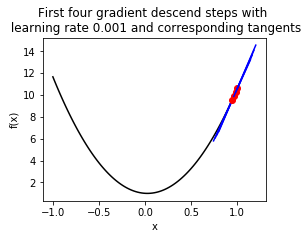

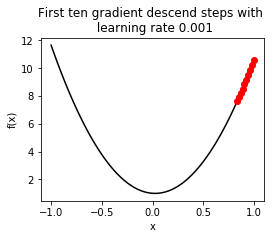

'For a learning rate at 0.001 the local minimum occurs at 0.024693232270255352 after 1272 iterations. The function value at the local minimum is 0.9938268478110839'

In [15]:
#for learning rate 0.001
rate = 0.001
plot_gradient_descend(rate)

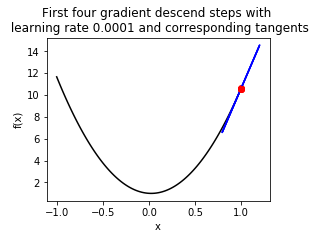

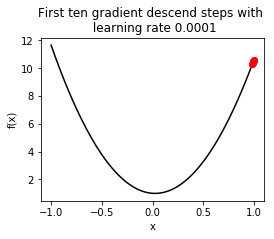

'For a learning rate at 0.0001 the local minimum occurs at 0.024693233808097063 after 10000 iterations. The function value at the local minimum is 0.993826847811084'

In [16]:
#for learning rate 0.0001
rate=0.0001
plot_gradient_descend(rate)

For a learning rate at 0.0001 the function does not converge before the maximum number of iterations is reached.

# Exercise 7 {-}

In exercise 7 logistic regression will be run and tested on the two Iris datasets. 

First the datasets are plotted with data points colored according to class. 

In [17]:
#import both Iris datasets
iris1train = np.loadtxt('Iris2D1_train.txt')
iris1test = np.loadtxt('Iris2D1_test.txt')
iris2train = np.loadtxt('Iris2D2_train.txt')
iris2test= np.loadtxt('Iris2D2_test.txt')

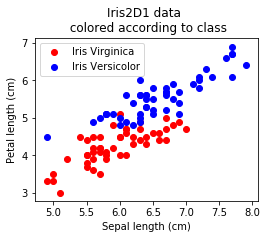

In [18]:
#plot first iris dataset
class0train = iris1train[:,:2][iris1train[:,2] == 0]
class1train = iris1train[:,:2][iris1train[:,2] == 1]
class0test = iris1test[:,:2][iris1test[:,2] == 0]
class1test = iris1test[:,:2][iris1test[:,2] == 1]

plt.figure()
plt.scatter(*np.concatenate((class0train, class0test)).T, c='r', label='Iris Virginica')
plt.scatter(*np.concatenate((class1train, class1test)).T, c='b', label='Iris Versicolor')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('Iris2D1 data \n colored according to class')
plt.legend()
plt.show()

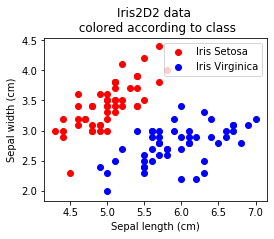

In [19]:
#plot second iris dataset
class0train = iris2train[:,:2][iris2train[:,2] == 0]
class1train = iris2train[:,:2][iris2train[:,2] == 1]
class0test = iris2test[:,:2][iris2test[:,2] == 0]
class1test = iris2test[:,:2][iris2test[:,2] == 1]

plt.figure()
plt.scatter(*np.concatenate((class0train, class0test)).T, c='r', label='Iris Setosa')
plt.scatter(*np.concatenate((class1train, class1test)).T, c='b', label='Iris Virginica')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Iris2D2 data \n colored according to class')
plt.legend()
plt.show()

Next, the functions needed for logistic regression are defined. 

In [20]:
#define functions for logistic regression
def log1px(x):
    return (x >= 0)*x + (np.log(1 + np.exp(-np.abs(x))))


def logistic(x):
    xp = (x >  0)*1.0
    xm = (x <= 0)*1.0
    return xm*(np.exp(x*xm))/(1 + np.exp(x*xm)) + xp*(1/(1 + np.exp(-xp*x)))


def logistic_insample(X, y, w):
    N, num_feat = X.shape
    E = 0
    for n in range(N):
        E = E + log1px(-y[n]*(X[n]@w))
    return E


def logistic_gradient(X, y, w):
    N, _ = X.shape
    g = 0*w
    
    for n in range(N):
        g = g - y[n]*logistic(-y[n]*(X[n]@w))*X[n]
    return g/N


def log_reg(Xorig, y, max_iter, grad_thr):   
    
    num_pts, num_feat = Xorig.shape
    onevec = np.ones((num_pts,1))
    X = np.concatenate((onevec, Xorig), axis = 1)
    dplus1 = num_feat + 1
    y = np.array((y-.5)*2)
        
    # Initialize learning rate for gradient descent
    learningrate = 0.1        
    
    # Initialize weights at time step 0  
    np.random.seed(42)
    w = 0.1*np.random.randn(num_feat + 1)
    
    # Compute value of logistic log likelihood
    value = logistic_insample(X,y,w)
    
    num_iter = 0  
    convergence = 0
    
    # Keep track of function values
    E_in = []
    
    while convergence == 0:
        num_iter = num_iter + 1                        

        # Compute gradient at current w      
        g = logistic_gradient(X,y,w)
       
        # Set direction to move and take a step       
        w_new = w - learningrate*g
        
        # Compute in-sample error for new w
        cur_value = logistic_insample(X,y,w_new)
        if cur_value < value:
            w = w_new
            value = cur_value
            E_in.append(value)
            learningrate *=1.1
        else:
            learningrate *= 0.9   
            
        # Determine whether we have converged    
        g_norm = np.linalg.norm(g)
        if g_norm < grad_thr:
            convergence = 1
        elif num_iter > max_iter:
            convergence = 1
           
    return w, E_in 


def log_pred(Xorig, w):
    N, d = Xorig.shape
    # add a first column with ones
    N1 = np.reshape(np.ones(N), (N, 1))
    X = np.hstack((N1, Xorig))
    # if the logistic function on w^T X[n] is >= 0.5, label 1 else label -1
    P = np.zeros(N)
    pred_classes = np.zeros_like(P, dtype=int)
    for n in range(N):
        P[n] = logistic(w @ X[n])
        pred_classes[n] = -1 if P[n] < 0.5 else 1
    return P, pred_classes

Next, logistic regression is applied to the first iris dataset and the training and test error is measured by the 0-1 loss. 

In [21]:
#find w's for first iris dataset
w, E = log_reg(iris1train[:,:2], iris1train[:,2], 10000, 0.0000001)
print('The three model parameters are ' + str(w))

#find training error rate for first iris dataset
N_train = len(iris1train[:,:2])
pred_classes_train = (log_pred(iris1train[:,:2], w)[1])/2+0.5
errors_train = np.sum([np.abs(pred_classes_train[i] - iris1train[:,2][i]) for i in range(len(pred_classes_train))])
error_rate_train = errors_train/N_train
print('The training error rate for the first dataset is ' + str(error_rate_train))

#find test error rate for first iris dataset
N_test = len(iris1test[:,:2])
pred_classes_test = (log_pred(iris1test[:,:2], w)[1])/2+0.5
errors_test = np.sum([np.abs(pred_classes_test[i]-iris1test[:,2][i]) for i in range(len(pred_classes_test))])
error_rate_test = errors_test/N_test
print('The test error rate for the first dataset is ' + str(error_rate_test))


The three model parameters are [-12.6948303   -4.61064838   8.40942812]
The training error rate for the first dataset is 0.05714285714285714
The test error rate for the first dataset is 0.06666666666666667


Finally, logistic regression is also applied to the second iris dataset and the training and test error rates are again measured by the 0-1 loss. 

In [22]:
#find w's for second iris dataset
w, E = log_reg(iris2train[:,:2], iris2train[:,2], 10000, 0.0000001)
print('The three model parameters are ' + str(w))

#find training error rate for second iris dataset
N_train = len(iris2train[:,:2])
pred_classes_train = (log_pred(iris2train[:,:2], w)[1])/2+0.5
errors_train = np.sum([np.abs(pred_classes_train[i] - iris2train[:,2][i]) for i in range(len(pred_classes_train))])
error_rate_train = errors_train/N_train
print('The training error rate for the second dataset is ' + str(error_rate_train))

#find test error rate for second iris dataset
N_test = len(iris2test[:,:2])
pred_classes_test = (log_pred(iris2test[:,:2], w)[1])/2+0.5
errors_test = np.sum([np.abs(pred_classes_test[i]-iris2test[:,2][i]) for i in range(len(pred_classes_test))])
error_rate_test = errors_test/N_test
print('The test error rate for the second dataset is ' + str(error_rate_test))

The three model parameters are [-28.94257781  12.67082293 -12.68334242]
The training error rate for the second dataset is 0.0
The test error rate for the second dataset is 0.0


Both the training and test error rates for the second iris dataset are 0. Considering the plot of the second dataset the low error rates make sense since the dataset visually looks very easily linearly separable. 

# Exercise 8 {-}

I choose to skip this exercise.

# Exercise 9a {-}

In exercise 9a the a small amount of the MNIST data is clustered using k-means clustering with k = 3. The 3-means clustering function used is a modified versions of the one used in Assignment 3 to perform 2-means clustering. 

First the three initial cluster centers are defined as three random points. Next the distances from each data point to each of the three cluster centers are computed and each datapoint is assigned to the closest cluster center. The new cluster center for each of the two clusters is then defined as the mean of the points belonging to that cluster. With new cluster centers defined the algorithm is repeated until the cluster centers no longer change. The 3-means clustering will return labels 0, 1 and 2 so in order to compare the labels from clustering with the labels from the labels.txt file, for each data point either a 1, 7 or 9 is appended to a list of clustering labels depending on what cluster the datapoint belongs to. 

In [23]:
#define 3-means clustering function
def clust_3means (A,B):
    
    #define random initial cluster centers
    np.random.seed(42)
    cen1 = A[np.random.randint(0,len(A))]
    cen2 = A[np.random.randint(0,len(A))]
    cen3 = A[np.random.randint(0,len(A))]
    
    #repeat the 3-means clustering until cluster centers are unchanged 
    for n in range(20):
        clust1 = []
        clust2 = []
        clust3 = []
        lab1 = [] #empty lists for labels
        lab2 = []
        lab3 = []
        clust_index = []
        oldcen1 = cen1
        oldcen2 = cen2
        oldcen3 = cen3
        #assign each data point to a cluster
        for i in range(len(A)):
            #distance between data point and cluster center 1
            dist1 = np.sqrt(sum((A[i][m]-cen1[m])**2 for m in range(len(A[0]))))
            #distance between data point and cluster center 2
            dist2 = np.sqrt(sum((A[i][m]-cen2[m])**2 for m in range(len(A[0]))))
            #distance between data point and cluster center 3
            dist3 = np.sqrt(sum((A[i][m]-cen3[m])**2 for m in range(len(A[0]))))
            if dist1 < dist2 and dist1 < dist3:
                clust1.append(A[i])
                lab1.append(B[i])
                clust_index.append(1)
            if dist2 < dist1 and dist2 < dist3:
                clust2.append(A[i])
                lab2.append(B[i])
                clust_index.append(2)
            if dist3 < dist1 and dist3 < dist2:
                clust3.append(A[i])
                lab3.append(B[i])
                clust_index.append(3)

        cen1 = np.array([np.mean(np.array(clust1)[:,i]) for i in range(len(clust1[0]))])
        cen2 = np.array([np.mean(np.array(clust2)[:,i]) for i in range(len(clust2[0]))])
        cen3 = np.array([np.mean(np.array(clust3)[:,i]) for i in range(len(clust3[0]))])

        if np.array_equal([cen1,cen2,cen3], [oldcen1,oldcen2,oldcen3]) == True:
            break
    
    return cen1, cen2, cen3, clust1, clust2, clust3, lab1, lab2, lab3, np.array(clust_index)

Next, the MNIST data is imported as the digits and labels.

In [24]:
#import digits and labels
digits = np.loadtxt('MNIST_179_digits.txt')
labels = np.loadtxt('MNIST_179_labels.txt')

Then 3-means clustering is performed on the digits data set. 

In [25]:
#perform 3-means clustering on digits data
cen1, cen2, cen3, clust1, clust2, clust3, lab1, lab2, lab3, clust_index = clust_3means(digits, labels)

The first cluster center is then plotted as an image and the percentages of 1, 7 and 9 in the first cluster is computed. 

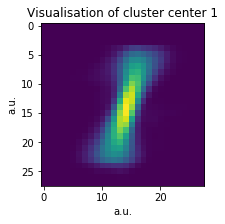

The percentage of 1s in cluster 1 is 89.83050847457628 %.
The percentage of 7s in cluster 1 is 7.74818401937046 %.
The percentage of 9s in cluster 1 is 2.4213075060532687 %.


In [26]:
#plot cluster 1 as image
plt.imshow(cen1.reshape(28,28))
plt.xlabel('a.u.')
plt.ylabel('a.u.')
plt.title('Visualisation of cluster center 1')
plt.show()

#compute percentage of each digit in cluster 1
ratio1 = np.unique(lab1, return_counts=True)[1][0]/sum(np.unique(lab1, return_counts=True)[1])
ratio7 = np.unique(lab1, return_counts=True)[1][1]/sum(np.unique(lab1, return_counts=True)[1])
ratio9 = np.unique(lab1, return_counts=True)[1][2]/sum(np.unique(lab1, return_counts=True)[1])

print('The percentage of 1s in cluster 1 is '+str(ratio1*100)+' %.')
print('The percentage of 7s in cluster 1 is '+str(ratio7*100)+' %.')
print('The percentage of 9s in cluster 1 is '+str(ratio9*100)+' %.')

Likewise for cluster 2 the cluster center is plotted as an image and the percentages of 1, 7 and 9 in cluster 2 is computed. 

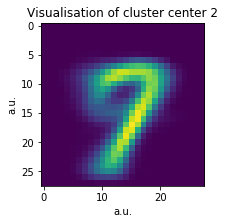

The percentage of 1s in cluster 2 is 0.2717391304347826 %.
The percentage of 7s in cluster 2 is 62.22826086956522 %.
The percentage of 9s in cluster 2 is 37.5 %.


In [27]:
#plot cluster 2 as image
plt.imshow(cen2.reshape(28,28))
plt.xlabel('a.u.')
plt.ylabel('a.u.')
plt.title('Visualisation of cluster center 2')
plt.show()

#compute percentage of each digit in cluster 2
ratio1 = np.unique(lab2, return_counts=True)[1][0]/sum(np.unique(lab2, return_counts=True)[1])
ratio7 = np.unique(lab2, return_counts=True)[1][1]/sum(np.unique(lab2, return_counts=True)[1])
ratio9 = np.unique(lab2, return_counts=True)[1][2]/sum(np.unique(lab2, return_counts=True)[1])

print('The percentage of 1s in cluster 2 is '+str(ratio1*100)+' %.')
print('The percentage of 7s in cluster 2 is '+str(ratio7*100)+' %.')
print('The percentage of 9s in cluster 2 is '+str(ratio9*100)+' %.')

For cluster 3 as well, the cluster center is plotted as an image and the percentages of 1, 7 and 9 in cluster 3 is computed.

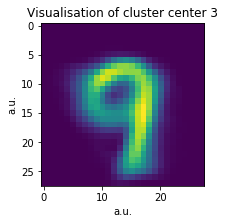

The percentage of 1s in cluster 3 is 0.872093023255814 %.
The percentage of 7s in cluster 3 is 33.13953488372093 %.
The percentage of 9s in cluster 3 is 65.98837209302324 %.


In [28]:
#plot cluster 3 as image
plt.imshow(cen3.reshape(28,28))
plt.xlabel('a.u.')
plt.ylabel('a.u.')
plt.title('Visualisation of cluster center 3')
plt.show()

#compute percentage of each digit in cluster 3
ratio1 = np.unique(lab3, return_counts=True)[1][0]/sum(np.unique(lab3, return_counts=True)[1])
ratio7 = np.unique(lab3, return_counts=True)[1][1]/sum(np.unique(lab3, return_counts=True)[1])
ratio9 = np.unique(lab3, return_counts=True)[1][2]/sum(np.unique(lab3, return_counts=True)[1])

print('The percentage of 1s in cluster 3 is '+str(ratio1*100)+' %.')
print('The percentage of 7s in cluster 3 is '+str(ratio7*100)+' %.')
print('The percentage of 9s in cluster 3 is '+str(ratio9*100)+' %.')

For each cluster the plot of the cluster center visually looks like the digit that is represented with the highest percentage in the cluster.

# Exercise 9b {-}

In exercise 9b a k-NN classifier is applied to the MNIST dataset using 5-fold cross validation to obtain the optimal k. In order to report at test accuracy and not a training accuracy, the dataset is split into a training and test set. 

First the k-NN function and 5-fold cross validation functions are defined.

In [29]:
#define k-NN function (from assignment 2)
def kNN(XTrain, YTrain, XTest, k):
    outputs = []
    for i in range(len(XTest)):
        distances = []
        for n in range(len(XTrain)):
            #compute distance to each neighbor and append to list of distances
            distances.append(np.sqrt(sum((XTrain[n][m]-XTest[i][m])**2 for m in range(len(XTrain[0])))))
        #classifiers for k nearest neighbors 
        k_nearest = [YTrain[neighbor_index] for neighbor_index in np.argsort(distances)[:k]]    
        #choose classifier most common in k nearest neighbors and append to list of outputs
        outputs.append(np.argmax(np.bincount(k_nearest)))
    
    return np.round(outputs)

#define k-fold cross validation function (from assignment 2)
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def model_selection(k_values, XTrain, YTrain):
    accuracies = []
    #splitting training data into 5 parts
    cv = KFold(n_splits=5)
    for k in ks:
        k_specific_accuracies = []
        for train_index, test_index in cv.split(XTrain):
            XTrainCV, XTestCV, YTrainCV, YTestCV = XTrain[train_index], XTrain[test_index], YTrain[train_index], YTrain[test_index]
            #test accuracy of kNN for given k 
            k_specific_accuracies.append(accuracy_score(YTestCV, kNN(XTrainCV, YTrainCV, XTestCV, k)))
        accuracies.append(np.round(np.mean(k_specific_accuracies),4))

    #find best k as the one with highest mean accuracy
    best_k = ks[np.argmax(accuracies)]
    return best_k

Next the MNIST dataset is split into a training and test set and 5-fold cross validation is performed on the training data to find the optimal k from the range k = {1,3,5,7}.

In [30]:
#split MNIST data into training and test data
cv = KFold(n_splits=2)
for train_index, test_index in cv.split(digits):
    xtrain, xtest, ytrain, ytest = digits[train_index], digits[test_index], labels[train_index], labels[test_index]

#perform k-fold cross validation to find best k
ks = [1,3,5,7]
print(model_selection(ks, xtrain, ytrain))

1


Using the optimal k found above, the test accuracy for the k_best-NN classfier is computed. 

In [31]:
#compute test accuracy of k_best-NN classifier
k_best=1
accTest_kbest = accuracy_score(ytest, kNN(xtrain, ytrain, xtest, k_best))
print('Test accuracy of k_best-NN classifier: ' + str(accTest_kbest))

Test accuracy of k_best-NN classifier: 0.9679715302491103


# Exercise 10 {-}

In exercsie 10 the digits dataset is split into a training and a test set and PCA is performed on the training data. After PCA is performed, 3-means clustering and k-NN classification is performed on the dimension reduced dataset to cluster and classify the dimension reduced data. 

First the PCA function is defined.

In [32]:
#define PCA function
def pca(A):
    #compute covariance matrix
    Sigma = np.cov(A.T)
    #compute eigenvalues and eigenvectors for covariance matrix
    evals, evecs = np.linalg.eigh(Sigma)
    # switch eigenvalue (and corresponding eigenvector) ordering
    evals = evals[::-1]
    evecs = evecs[:,::-1]
    
    return evals, evecs   

Next, the data is split into training and test data. The training data is standardised to unit standard deviation and PCA is performed on the dataset. 

In [33]:
#import digits and labels
digits = np.loadtxt('MNIST_179_digits.txt')
labels = np.loadtxt('MNIST_179_labels.txt')

#split dataset into training and test data
cv = KFold(n_splits=2)
for train_index, test_index in cv.split(digits):
    xtrain, xtest, ytrain, ytest = digits[train_index], digits[test_index], labels[train_index], labels[test_index]   
    
#normalize the data to standard deviation 1
for i in range(len(xtrain[0])):
    if np.std(xtrain[:,i]) != 0:
        xtrain[:,i] = xtrain[:,i]/np.std(xtrain[:,i])

#perform PCA on normalized data
evals, evecs = pca(xtrain)

The cumulative normalized variance is plotted as a function of principal component (PC) index. 

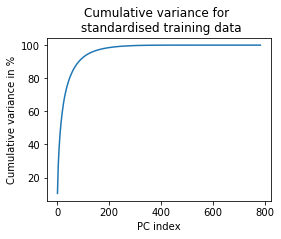

In [34]:
#compute and plot cumulative normalised variance
c_var = 100*np.cumsum(evals/np.sum(evals))
PC_index = np.linspace(1,len(evals),len(evals))

plt.figure()
plt.plot(PC_index, c_var)
plt.xlabel('PC index')
plt.ylabel('Cumulative variance in %')
plt.title('Cumulative variance for \n standardised training data')
plt.show()

On the plot it is seen how most of the variance in the data is captured in the first 200 PCs. 

Next the 3-means clustering from exercise 9a is repeated for the dimension reduced training dataset. 
First the training data is projected onto the first 20 PCs and 3-means clustering is performed on the dimension reduced training data. The average image for each cluster is then plotted and the percentage of 1, 7 and 9 in each cluster is computed. 

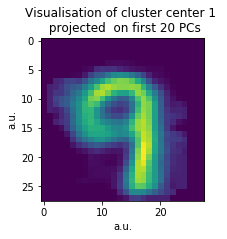

The percentage of 1s in cluster 1 is 0 %.
The percentage of 7s in cluster 1 is 32.33082706766917 %.
The percentage of 9s in cluster 1 is 67.66917293233082 %.


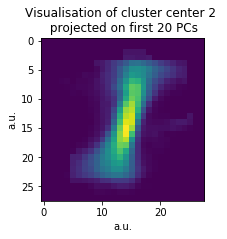

The percentage of 1s in cluster 2 is 81.65137614678899 %.
The percentage of 7s in cluster 2 is 12.844036697247708 %.
The percentage of 9s in cluster 2 is 5.5045871559633035 %.


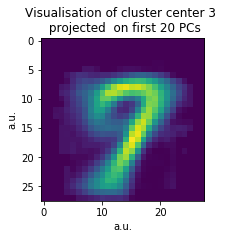

The percentage of 1s in cluster 3 is 0.4716981132075472 %.
The percentage of 7s in cluster 3 is 60.37735849056604 %.
The percentage of 9s in cluster 3 is 39.15094339622642 %.


In [35]:
#project digits data onto first 20 PCs
projected_20 = evecs[:,:20].T@xtrain.T

#perform 3-means clustering on the projected data
cen1, cen2, cen3, clust1, clust2, clust3, lab1, lab2, lab3, clust_index = clust_3means((projected_20).T,ytrain)

#plot cluster 1 as image
plt.imshow(xtrain[clust_index==1].mean(axis=0).reshape(28,28))
plt.xlabel('a.u.')
plt.ylabel('a.u.')
plt.title('Visualisation of cluster center 1 \n projected  on first 20 PCs')
plt.show()

#compute percentage of each digit in cluster 1
ratio1 = 0
ratio7 = np.unique(lab1, return_counts=True)[1][0]/sum(np.unique(lab1, return_counts=True)[1])
ratio9 = np.unique(lab1, return_counts=True)[1][1]/sum(np.unique(lab1, return_counts=True)[1])

print('The percentage of 1s in cluster 1 is '+str(ratio1*100)+' %.')
print('The percentage of 7s in cluster 1 is '+str(ratio7*100)+' %.')
print('The percentage of 9s in cluster 1 is '+str(ratio9*100)+' %.')

#plot cluster 2 as image
plt.imshow(xtrain[clust_index==2].mean(axis=0).reshape(28,28))
plt.xlabel('a.u.')
plt.ylabel('a.u.')
plt.title('Visualisation of cluster center 2 \n projected on first 20 PCs')
plt.show()

#compute percentage of each digit in cluster 2
ratio1 = np.unique(lab2, return_counts=True)[1][0]/sum(np.unique(lab2, return_counts=True)[1])
ratio7 = np.unique(lab2, return_counts=True)[1][1]/sum(np.unique(lab2, return_counts=True)[1])
ratio9 = np.unique(lab2, return_counts=True)[1][2]/sum(np.unique(lab2, return_counts=True)[1])

print('The percentage of 1s in cluster 2 is '+str(ratio1*100)+' %.')
print('The percentage of 7s in cluster 2 is '+str(ratio7*100)+' %.')
print('The percentage of 9s in cluster 2 is '+str(ratio9*100)+' %.')

#plot cluster 3 as image
plt.imshow(xtrain[clust_index==3].mean(axis=0).reshape(28,28))
plt.xlabel('a.u.')
plt.ylabel('a.u.')
plt.title('Visualisation of cluster center 3 \n projected  on first 20 PCs')
plt.show()

#compute percentage of each digit in cluster 3
ratio1 = np.unique(lab3, return_counts=True)[1][0]/sum(np.unique(lab3, return_counts=True)[1])
ratio7 = np.unique(lab3, return_counts=True)[1][1]/sum(np.unique(lab3, return_counts=True)[1])
ratio9 = np.unique(lab3, return_counts=True)[1][2]/sum(np.unique(lab3, return_counts=True)[1])

print('The percentage of 1s in cluster 3 is '+str(ratio1*100)+' %.')
print('The percentage of 7s in cluster 3 is '+str(ratio7*100)+' %.')
print('The percentage of 9s in cluster 3 is '+str(ratio9*100)+' %.')

For each cluster the plot of the cluster center visually looks like the digit that is represented with the highest percentage in the cluster.

Next the training data is projected onto its first 200 PCs and 3-means clustering is performed. The average image for each cluster is shown and the percentage of 1, 7 and 9 in each cluster is computed, once again. 

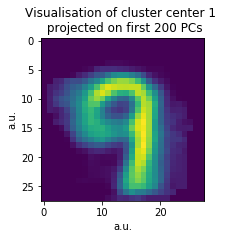

The percentage of 1s in cluster 1 is 0 %.
The percentage of 7s in cluster 1 is 34.78260869565217 %.
The percentage of 9s in cluster 1 is 65.21739130434783 %.


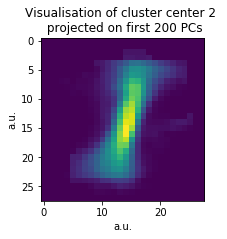

The percentage of 1s in cluster 2 is 80.9090909090909 %.
The percentage of 7s in cluster 2 is 13.18181818181818 %.
The percentage of 9s in cluster 2 is 5.909090909090909 %.


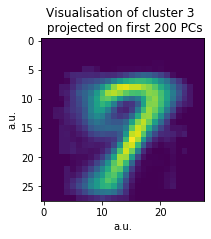

The percentage of 1s in cluster 3 is 0.5494505494505495 %.
The percentage of 7s in cluster 3 is 62.637362637362635 %.
The percentage of 9s in cluster 3 is 36.81318681318682 %.


In [36]:
#project digits data onto first 200 PCs
projected_200 = evecs[:,:200].T@xtrain.T

# perform 3-means clustering on the projected data
cen1, cen2, cen3, clust1, clust2, clust3, lab1, lab2, lab3, clust_index = clust_3means((projected_200).T,ytrain)

#plot cluster 1 as image
plt.imshow(xtrain[clust_index==1].mean(axis=0).reshape(28,28))
plt.xlabel('a.u.')
plt.ylabel('a.u.')
plt.title('Visualisation of cluster center 1 \n projected on first 200 PCs')
plt.show()

#compute percentage of each digit in cluster 1
ratio1 = 0
ratio7 = np.unique(lab1, return_counts=True)[1][0]/sum(np.unique(lab1, return_counts=True)[1])
ratio9 = np.unique(lab1, return_counts=True)[1][1]/sum(np.unique(lab1, return_counts=True)[1])

print('The percentage of 1s in cluster 1 is '+str(ratio1*100)+' %.')
print('The percentage of 7s in cluster 1 is '+str(ratio7*100)+' %.')
print('The percentage of 9s in cluster 1 is '+str(ratio9*100)+' %.')

#plot cluster 2 as image
plt.imshow(xtrain[clust_index==2].mean(axis=0).reshape(28,28))
plt.xlabel('a.u.')
plt.ylabel('a.u.')
plt.title('Visualisation of cluster center 2 \n projected on first 200 PCs')
plt.show()

#compute percentage of each digit in cluster 2
ratio1 = np.unique(lab2, return_counts=True)[1][0]/sum(np.unique(lab2, return_counts=True)[1])
ratio7 = np.unique(lab2, return_counts=True)[1][1]/sum(np.unique(lab2, return_counts=True)[1])
ratio9 = np.unique(lab2, return_counts=True)[1][2]/sum(np.unique(lab2, return_counts=True)[1])

print('The percentage of 1s in cluster 2 is '+str(ratio1*100)+' %.')
print('The percentage of 7s in cluster 2 is '+str(ratio7*100)+' %.')
print('The percentage of 9s in cluster 2 is '+str(ratio9*100)+' %.')

#plot cluster 3 as image
plt.imshow(xtrain[clust_index==3].mean(axis=0).reshape(28,28))
plt.xlabel('a.u.')
plt.ylabel('a.u.')
plt.title('Visualisation of cluster 3 \n projected on first 200 PCs')
plt.show()

#compute percentage of each digit in cluster 3
ratio1 = np.unique(lab3, return_counts=True)[1][0]/sum(np.unique(lab3, return_counts=True)[1])
ratio7 = np.unique(lab3, return_counts=True)[1][1]/sum(np.unique(lab3, return_counts=True)[1])
ratio9 = np.unique(lab3, return_counts=True)[1][2]/sum(np.unique(lab3, return_counts=True)[1])

print('The percentage of 1s in cluster 3 is '+str(ratio1*100)+' %.')
print('The percentage of 7s in cluster 3 is '+str(ratio7*100)+' %.')
print('The percentage of 9s in cluster 3 is '+str(ratio9*100)+' %.')

For each cluster the plot of the cluster center visually looks like the digit that is represented with the highest percentage in the cluster.

Next, k-fold cross validation is performed on the training data projected on the first 20 PCs to find the optimal k. Using the best k the test accuracy of the k_best-NN classifier is the computed.  

In [37]:
#project traning and test data on 20 first PCs
projected_20_train = evecs[:,:20].T@xtrain.T
projected_20_test = evecs[:,:20].T@xtest.T

#perform k-fold cross validation to find best k
ks = [1,3,5,7]
k_best = model_selection(ks, projected_20_train, ytrain)

In [38]:
#compute test accuracy of k_best-NN classifier
accTest_kbest = accuracy_score(ytest, kNN(projected_20_train.T, ytrain, projected_20_test.T, k_best))
print('Test accuracy of k_best-NN classifier: ' + str(accTest_kbest))

Test accuracy of k_best-NN classifier: 0.9199288256227758


Finally, k-fold cross validation is performed on the traning data projected on the first 200 PCs to find the best k, and the test accuracy of the k_best-NN classifier is computed

In [39]:
#project traning and test data on 200 first PCs
projected_200_train = evecs[:,:200].T@xtrain.T
projected_200_test = evecs[:,:200].T@xtest.T

#perform k-fold cross validation to find best k
ks = [1,3,5,7]
k_best = model_selection(ks, projected_200_train, ytrain)

In [40]:
#compute test accuracy of k_best-NN classifier
accTest_kbest = accuracy_score(ytest, kNN(projected_200_train.T, ytrain, projected_200_test.T, k_best))
print('Test accuracy of k_best-NN classifier: ' + str(accTest_kbest))

Test accuracy of k_best-NN classifier: 0.8932384341637011


Performing PCA on the data before performing k-NN classification reduces the test accuracy of the k-NN classification.  Projecting the data onto the first 20 PCs gave a test accuracy of 92%. Projecting the data onto the first 200 PCs gave a test accuracy of 89%. Doing k-NN classification without dimension reduction gave a test accuracy of 97% (in exercise 9b). These results are surprising to me. I would have expected the test accuracy to be higher for the data projected onto the first 200 PCs than for the first 20 PCs.  